In [1]:
import json
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
train_json = 'al5083/al5083/train/train.json'

with open(train_json, 'r') as json_file:
    train_data_json = json.load(json_file)
label_names = ["good weld", "burn through", "contamination", "lack of fusion", "misalignment", "lack of penetration"]
labels = [1,2,3,4,5,6]
# one_hot_encoding = tf.keras.utils.to_categorical(labels, num_classes=6)
label_count = [0, 0, 0, 0, 0, 0]
path = 'al5083/al5083/train'
all_data = []
image_size = (28,28)
label_count = [0, 0, 0, 0, 0, 0]
def load_data(path):
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if(os.path.isdir(folder_path)):
            for img_name in os.listdir(folder_path):

                img_path = os.path.join(folder_path, img_name)
                key_name = folder + '/' + img_name
                label = train_data_json[key_name]

                if(label_count[label] > 2000):
                    continue

                label_count[label] += 1
                image = Image.open(img_path).resize(image_size)
                image = tf.convert_to_tensor(image)
                all_data.append((image, labels[label]))

                if(len(all_data)%100==0):
                    print(f"Total images loaded : {len(all_data)}, Label count : {label_count}", end = '\r')
label_distribution = {}
for _, label in all_data:
    if label not in label_distribution:
        label_distribution[label] = 0
    label_distribution[label] += 1

print("Label Distribution in all_data:", label_distribution)
import random

def create_balanced_data(all_data, desired_counts):
    # Dictionary to keep track of how many samples we've added per label
    label_counter = {label: 0 for label in desired_counts}
    balanced_data = []

    for image, label in all_data:
        
        if label not in desired_counts:
            continue

        # Check if we've reached the desired count for this label
        if label_counter[label] < desired_counts.get(label, 0):
            balanced_data.append((image, label))
            label_counter[label] += 1

        # Break early if all labels have reached their desired counts
        if all(count == desired_counts[label] for label, count in label_counter.items()):
            break

    return balanced_data

# Define the desired label counts
desired_counts = {
    1: 2001,  # good weld
    2: 500,   # burn through
    3: 500,   # contamination
    4: 500,   # lack of fusion
    5: 500,   # misalignment
    6: 500    # lack of penetration
}

# Assuming the labels in your all_data correspond to the above order
new_data = create_balanced_data(all_data, desired_counts)

# Check the new dataset's label distribution
new_label_counts = {label: 0 for label in desired_counts}
for _, label in new_data:
    new_label_counts[label] += 1

print("New Label Counts:", new_label_counts)



def convert_to_greyscale(image):
    if isinstance(image, (tf.Tensor, np.ndarray)):
        # Convert tensor or array to PIL image
        image = Image.fromarray(image.numpy() if isinstance(image, tf.Tensor) else image)
    
    # Convert to greyscale
    greyscale_image = image.convert('L')
    return greyscale_image

# Example usage
def save_greyscale_images(data, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for idx, (image, label) in enumerate(data):
        greyscale_image = convert_to_greyscale(image)
        label_folder = os.path.join(save_path, f'label_{label}')
        
        if not os.path.exists(label_folder):
            os.makedirs(label_folder)
        
        image_save_path = os.path.join(label_folder, f'image_{idx}.png')
        greyscale_image.save(image_save_path)

# Save greyscale images
save_greyscale_images(new_data, '/absolute/path/to/greyscale_dataset')

print("Greyscale images saved to 'greyscale_dataset' folder.")
greyscale_dataset = load_greyscale_images_from_folder('greyscale_dataset')
def reshape_images_tf(dataset):
    new_images = []
    new_labels = []

    for images, labels in dataset:
        images = tf.squeeze(images)  # Remove extra dimensions
        new_images.extend(images.numpy())
        new_labels.extend(labels.numpy())

    new_images = np.array(new_images)
    new_labels = np.array(new_labels)
    new_dataset = tf.data.Dataset.from_tensor_slices((new_images, new_labels))
    new_dataset = new_dataset.shuffle(buffer_size=len(new_images)).batch(32).prefetch(tf.data.AUTOTUNE)
    
    return new_dataset

# Convert dataset
modified_dataset = reshape_images_tf(greyscale_dataset)
images, labels = modified_dataset
df_images = pd.DataFrame(images)
df_labels = pd.DataFrame(labels, columns=['Label'])

# Combine images and labels into a single DataFrame
df = pd.concat([df_images, df_labels], axis=1)

In [5]:
load_data('al5083/al5083/train')

In [6]:
print(len(all_data))

11788


In [7]:
print("Label Counts:")
for i, count in enumerate(label_count):
    print(f"  {label_names[i]}: {count}")

Label Counts:
  good weld: 2001
  burn through: 1783
  contamination: 2001
  lack of fusion: 2001
  misalignment: 2001
  lack of penetration: 2001


Label Distribution in all_data: {3: 2001, 6: 2001, 5: 2001, 1: 2001, 2: 1783, 4: 2001}


In [14]:
import random

def create_balanced_data(all_data, desired_counts):
    # Dictionary to keep track of how many samples we've added per label
    label_counter = {label: 0 for label in desired_counts}
    balanced_data = []

    for image, label in all_data:
        
        if label not in desired_counts:
            continue

        # Check if we've reached the desired count for this label
        if label_counter[label] < desired_counts.get(label, 0):
            balanced_data.append((image, label))
            label_counter[label] += 1

        # Break early if all labels have reached their desired counts
        if all(count == desired_counts[label] for label, count in label_counter.items()):
            break

    return balanced_data

# Define the desired label counts
desired_counts = {
    1: 2001,  # good weld
    2: 500,   # burn through
    3: 500,   # contamination
    4: 500,   # lack of fusion
    5: 500,   # misalignment
    6: 500    # lack of penetration
}

# Assuming the labels in your all_data correspond to the above order
new_data = create_balanced_data(all_data, desired_counts)

# Check the new dataset's label distribution
new_label_counts = {label: 0 for label in desired_counts}
for _, label in new_data:
    new_label_counts[label] += 1

print("New Label Counts:", new_label_counts)


New Label Counts: {1: 2001, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500}


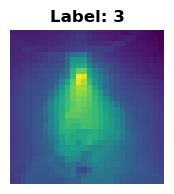

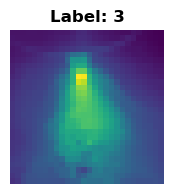

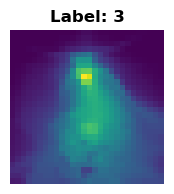

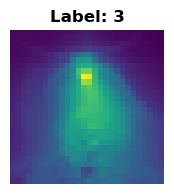

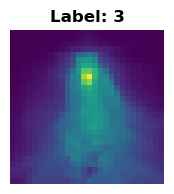

In [15]:
# Display a few images from the new_data along with their labels
def display_sample_images(data, num_samples=5):
    for i in range(num_samples):
        image, label = data[i]
        
        # Convert the tensor image to a PIL image if needed
        if isinstance(image, (tf.Tensor, np.ndarray)):
            image = Image.fromarray(image.numpy())

        plt.figure(figsize=(2, 2))
        plt.imshow(image)
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()

display_sample_images(new_data, num_samples=5)

Greyscale images saved to 'greyscale_dataset' folder.


In [19]:
def extract_label_from_folder_name(folder_name):
    # Assuming the folder name is in the format 'label_<number>'
    try:
        # Extract the number after 'label_'
        label = int(folder_name.split('_')[-1])
        return label
    except ValueError:
        raise ValueError(f"Folder name '{folder_name}' is not in the expected format 'label_<number>'")

def load_greyscale_images_from_folder(folder_path, image_size=(28, 28)):
    images = []
    labels = []

    for label_folder in os.listdir(folder_path):
        label_folder_path = os.path.join(folder_path, label_folder)
        if os.path.isdir(label_folder_path):
            try:
                label = extract_label_from_folder_name(label_folder)
            except ValueError as e:
                print(e)
                continue

            for img_name in os.listdir(label_folder_path):
                img_path = os.path.join(label_folder_path, img_name)
                image = Image.open(img_path).resize(image_size).convert('L')
                image = np.array(image)
                images.append(image)
                labels.append(label)

    # Convert lists to arrays
    images = np.array(images)
    labels = np.array(labels)

    # Normalize images to [0, 1]
    images = images / 255.0

    # Convert to TensorFlow datasets
    dataset = tf.data.Dataset.from_tensor_slices((images[..., np.newaxis], labels))
    dataset = dataset.shuffle(buffer_size=len(images)).batch(32).prefetch(tf.data.AUTOTUNE)
    
    return dataset

In [20]:
greyscale_dataset = load_greyscale_images_from_folder('greyscale_dataset')

In [21]:
def print_tf_dataset_entries(dataset, num_entries=5):
    iterator = iter(dataset)
    for _ in range(num_entries):
        images, labels = next(iterator)
        for i in range(images.shape[0]):
            print(f"Image Shape: {images[i].shape}, Label: {labels[i].numpy()}")

# Print the first few entries
print_tf_dataset_entries(greyscale_dataset, num_entries=5)

Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 4
Image Shape: (28, 28, 1), Label: 5
Image Shape: (28, 28, 1), Label: 3
Image Shape: (28, 28, 1), Label: 3
Image Shape: (28, 28, 1), Label: 4
Image Shape: (28, 28, 1), Label: 5
Image Shape: (28, 28, 1), Label: 4
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 6
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 6
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 6
Image Shape: (28, 28, 1), Label: 4
Image Shape: (28, 28, 1), Label: 4
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 5
Image Shape: (28, 28, 1), Label: 6
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 4
Image Shape: (28, 28, 1), Label: 5
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 3
Image Shape: (28, 28, 1), Label: 1
Image Shape: (28, 28, 1), Label: 6
Image Shape: (28, 28, 1), Label: 6
Image Shape: (28, 28

In [26]:
def reshape_images_tf(dataset):
    new_images = []
    new_labels = []

    for images, labels in dataset:
        images = tf.squeeze(images)  # Remove extra dimensions
        new_images.extend(images.numpy())
        new_labels.extend(labels.numpy())

    new_images = np.array(new_images)
    new_labels = np.array(new_labels)
    new_dataset = tf.data.Dataset.from_tensor_slices((new_images, new_labels))
    new_dataset = new_dataset.shuffle(buffer_size=len(new_images)).batch(32).prefetch(tf.data.AUTOTUNE)
    
    return new_dataset

# Convert dataset
modified_dataset = reshape_images_tf(greyscale_dataset)

Image Tensor: tf.Tensor(
[[0.01960784 0.01568627 0.01568627 0.00392157 0.00392157 0.00392157
  0.00784314 0.01568627 0.01960784 0.03137255 0.03529412 0.04705882
  0.0627451  0.07058824 0.0745098  0.06666667 0.05098039 0.04313725
  0.04313725 0.03921569 0.03529412 0.03529412 0.03529412 0.03529412
  0.04313725 0.0745098  0.06666667 0.05882353]
 [0.02745098 0.01960784 0.02352941 0.01176471 0.00392157 0.00392157
  0.01176471 0.01568627 0.01960784 0.03529412 0.04705882 0.05490196
  0.07058824 0.08235294 0.08235294 0.0745098  0.05882353 0.05098039
  0.05098039 0.04705882 0.04313725 0.04313725 0.04313725 0.04313725
  0.0745098  0.09411765 0.08235294 0.08235294]
 [0.04313725 0.03921569 0.02352941 0.01568627 0.01176471 0.01176471
  0.01568627 0.01960784 0.02745098 0.04705882 0.0627451  0.0745098
  0.09019608 0.09803922 0.10196078 0.09411765 0.07843137 0.07058824
  0.0627451  0.05490196 0.05098039 0.04705882 0.05490196 0.08235294
  0.10980392 0.10196078 0.09411765 0.09411765]
 [0.05882353 0.0666

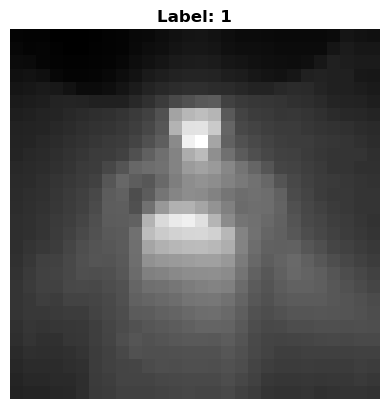

In [46]:
for batch_images, batch_labels in modified_dataset.take(1):  # Take only the first batch
    # Inspect the tensor directly
    print("Image Tensor:", batch_images[0])
    print("Label Tensor:", batch_labels[0])

    # Optionally, you can still convert to NumPy for visualization
    image = batch_images[0].numpy()
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {batch_labels[0].numpy()}')
    plt.axis('off')
    plt.show()

In [45]:
def print_tf_dataset_entries(dataset, num_entries=5):
    iterator = iter(dataset)
    for _ in range(num_entries):
        images, labels = next(iterator)
        for i in range(images.shape[0]):
            print(f"Image Shape: {images[i].shape}, Label: {labels[i].numpy()}")

print_tf_dataset_entries(modified_dataset, num_entries=5)

Image Shape: (28, 28), Label: 3
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 6
Image Shape: (28, 28), Label: 3
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 3
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 3
Image Shape: (28, 28), Label: 5
Image Shape: (28, 28), Label: 4
Image Shape: (28, 28), Label: 6
Image Shape: (28, 28), Label: 3
Image Shape: (28, 28), Label: 3
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 5
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 6
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 6
Image Shape: (28, 28), Label: 6
Image Shape: (28, 28), Label: 1
Image Shape: (28, 28), Label: 5
Image Shape: (28, 28), Label: 2
Image Sh

In [50]:
import pandas as pd
import numpy as np

# Lists to store the flattened images and corresponding labels
flattened_images = []
labels = []

# Iterate over the dataset and extract images and labels
for batch_images, batch_labels in modified_dataset:
    # Convert tensors to NumPy arrays
    batch_images = batch_images.numpy()
    batch_labels = batch_labels.numpy()
    
    # Flatten the images (e.g., from (28, 28) to (784,))
    batch_images_flattened = batch_images.reshape(batch_images.shape[0], -1)
    
    # Append the flattened images and labels to the lists
    flattened_images.extend(batch_images_flattened)
    labels.extend(batch_labels)

# Convert the lists to NumPy arrays
flattened_images = np.array(flattened_images)
labels = np.array(labels)
num_pixels = flattened_images.shape[1]
pixel_columns = [f'pixel_{i}' for i in range(num_pixels)]

# Create DataFrame with images and labels
df_images = pd.DataFrame(flattened_images, columns=pixel_columns)
df_labels = pd.DataFrame(labels, columns=['Label'])

# Combine the DataFrames into one
df = pd.concat([df_images, df_labels], axis=1)

# Display the first few rows of the DataFrame
print(df.head())


    pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0  0.062745  0.011765  0.015686  0.023529  0.027451  0.031373  0.035294   
1  0.023529  0.015686  0.015686  0.031373  0.054902  0.074510  0.101961   
2  0.070588  0.082353  0.082353  0.070588  0.066667  0.062745  0.054902   
3  0.031373  0.023529  0.019608  0.015686  0.015686  0.019608  0.027451   
4  0.035294  0.027451  0.023529  0.019608  0.015686  0.015686  0.019608   

    pixel_7   pixel_8   pixel_9  ...  pixel_775  pixel_776  pixel_777  \
0  0.043137  0.047059  0.050980  ...   0.298039   0.301961   0.290196   
1  0.121569  0.149020  0.168627  ...   0.341176   0.313725   0.286275   
2  0.050980  0.054902  0.054902  ...   0.290196   0.301961   0.317647   
3  0.035294  0.043137  0.054902  ...   0.200000   0.188235   0.188235   
4  0.023529  0.035294  0.047059  ...   0.282353   0.258824   0.270588   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  Label  
0   0.290196   0.286275   0.27843

In [51]:
labels = np.array(labels)  # Ensure labels is a NumPy array

# Convert labels to integer type
labels_int = labels.astype(int)

# Optionally, print to verify
print(labels_int)
print(labels_int.dtype)

[5 4 5 ... 1 3 5]
int32


In [64]:
mask = labels_int != 1

# Update the labels: set labels to 0 where mask is True
labels_int[mask] = 0

# Optionally, print to verify the changes
print(labels_int[4290])

1


In [56]:
counts = np.bincount(labels_int)


count_0 = counts[0]
count_1 = counts[1]


print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")

Count of 0: 2500
Count of 1: 2001


In [57]:
df['Label'] = labels_int

# Optionally, print to verify the update
print(df.head())

    pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0  0.062745  0.011765  0.015686  0.023529  0.027451  0.031373  0.035294   
1  0.023529  0.015686  0.015686  0.031373  0.054902  0.074510  0.101961   
2  0.070588  0.082353  0.082353  0.070588  0.066667  0.062745  0.054902   
3  0.031373  0.023529  0.019608  0.015686  0.015686  0.019608  0.027451   
4  0.035294  0.027451  0.023529  0.019608  0.015686  0.015686  0.019608   

    pixel_7   pixel_8   pixel_9  ...  pixel_775  pixel_776  pixel_777  \
0  0.043137  0.047059  0.050980  ...   0.298039   0.301961   0.290196   
1  0.121569  0.149020  0.168627  ...   0.341176   0.313725   0.286275   
2  0.050980  0.054902  0.054902  ...   0.290196   0.301961   0.317647   
3  0.035294  0.043137  0.054902  ...   0.200000   0.188235   0.188235   
4  0.023529  0.035294  0.047059  ...   0.282353   0.258824   0.270588   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  Label  
0   0.290196   0.286275   0.27843

In [65]:
df_images = pd.DataFrame(flattened_images, columns=pixel_columns)  # Flattened image data
df_labels = pd.DataFrame(labels_int, columns=['Label'])  # Corresponding labels

# Combine images and labels into a single DataFrame
df = pd.concat([df_images, df_labels], axis=1)

In [66]:
df.to_csv('images_and_labels.csv', index=False)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your DataFrame and 'Label' is the target column
X = df.drop(columns='Label')  # Features
y = df['Label']  # Target

# Split the data into training and testing sets
X_trai, X_tes, y_trai, y_tes = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for many models)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [63]:
print(X_trai.shape)  # To see the shape of the training data
print(X_trai)
print(y_trai)


(3600, 784)
       pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
4290  0.019608  0.054902  0.050980  0.047059  0.047059  0.050980  0.054902   
3039  0.003922  0.007843  0.015686  0.019608  0.031373  0.039216  0.050980   
605   0.000000  0.000000  0.000000  0.007843  0.035294  0.070588  0.098039   
2195  0.031373  0.031373  0.031373  0.023529  0.019608  0.023529  0.027451   
1164  0.039216  0.031373  0.031373  0.023529  0.019608  0.023529  0.023529   
...        ...       ...       ...       ...       ...       ...       ...   
4426  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
466   0.007843  0.015686  0.031373  0.039216  0.043137  0.047059  0.047059   
3092  0.015686  0.015686  0.015686  0.015686  0.015686  0.015686  0.019608   
3772  0.070588  0.078431  0.082353  0.082353  0.062745  0.050980  0.050980   
860   0.027451  0.019608  0.027451  0.039216  0.058824  0.090196  0.121569   

       pixel_7   pixel_8   pixel_9  ...  pixel_774 

In [68]:
df = pd.read_csv('images_and_labels.csv')

In [69]:
X = df.drop(columns=['Label'])
y = df['Label']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reshaped = X_train.values.reshape(-1, 1, 28, 28)
X_test_reshaped = X_test.values.reshape(-1, 1, 28, 28)

In [73]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/18/cf/f69dff972a748e08e1bf602ef94ea5c6d4dd2f41cea22c8ad67a607d8b41/torch-2.4.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/197.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/197.9 MB 3.2 MB/s eta 0:01:02
   ---------------------------------------- 0.3/197.9 MB 3.4 MB/s eta 0:00:59
   ---------------------------------------- 0.5/197.9 MB 4.1 MB/s eta 0:00:49
   ---------------------------------------- 0.8/197.9 MB 4.4 MB/s eta 0:00:45
   ---------------------------------------- 1.0/197.9 MB 4.7 MB/s eta 0:00:42
   ---------------------------------------- 1.2/197.9 MB 4.6 MB/s eta 0:00:43
   ---------------------------

In [74]:
import numpy as np
import torch
from torch.utils.data import Dataset

class NumpyDataset(Dataset):
    
    def __init__(self, x, y):
        if isinstance(x, np.ndarray):
            self.x = torch.from_numpy(x).to(torch.float)
        else:
            raise TypeError("x should be a numpy array")
        
        if isinstance(y, np.ndarray):
            if len(y.shape) == 1:
                y = y.reshape(-1, 1)
            self.y = torch.from_numpy(y).view(-1).long()
        else:
            raise TypeError("y should be a numpy array or pandas Series")

    def __getitem__(self, i):
        return self.x[i], self.y[i]

    def __len__(self):
        return len(self.y)


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\Aryan\anaconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [ ]:
tr_data = NumpyDataset(X_train_reshaped, y_train.values)
test_data = NumpyDataset(X_test_reshaped, y_test.values)
from torch.utils.data import DataLoader
tr_loader = iter(DataLoader(tr_data, batch_size = 50, shuffle = True))
test_loader = iter(DataLoader(test_data, batch_size = 15, shuffle = True))

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap,RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_algorithms.utils import algorithm_globals

In [ ]:
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn = create_qnn()

In [ ]:
import torch
from torch import cat, no_grad, manual_seed
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F

In [ ]:
import torch.nn as nn
# class Net(nn.Module):
#     def __init__(self, qnn):
#         super().__init__()
#         self.conv1 = Conv2d(1, 2, kernel_size=5)
#         self.conv2 = Conv2d(2, 16, kernel_size=5)
#         self.dropout = Dropout2d()
#         self.fc1 = Linear(256, 64)
#         self.fc2 = Linear(64, 2)  # 2-dimensional input to QNN
#         self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
#         # uniformly at random from interval [-1,1].
#         self.fc3 = Linear(1, 1)  # 1-dimensional output from QNN

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = F.max_pool2d(x, 2)
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, 2)
#         x = self.dropout(x)
#         x = x.view(x.shape[0], -1)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         x = self.qnn(x)  # apply QNN
#         x = self.fc3(x)
#         x = torch.sigmoid(self.fc1(x))
#         x = torch.sigmoid(self.fc1(x))

#         x = self.qnn(x)
#         x = torch.linear(self.fc3(x))
#         return cat((x, 1 - x), -1)
class Net(nn.Module):
    def __init__(self, qnn):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, kernel_size=5)
        self.conv2 = nn.Conv2d(2, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(16 * 4 * 4, 64)  # Corrected input size to match flattened conv output
        self.fc2 = nn.Linear(64, 2)  # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)
        self.fc3 = nn.Linear(1, 1)  # Correct the input size here to match QNN output

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # Apply QNN
        x = self.fc3(x)  # Apply final linear layer and sigmoid
        return x
# class Net(nn.Module):
#     def __init__(self, qnn):
#         super().__init__()
#         self.fc1 = nn.Linear(784, 128)  # Input size matches the number of features in data
#         self.fc2 = nn.Linear(128, 2)    # Output size matches the number of classes
#         self.qnn = TorchConnector(qnn)
#         self.fc3 = nn.Linear(2, 1)      # Final layer to adjust the output size from QNN

#     def forward(self, x):
#         x = torch.sigmoid(self.fc1(x))
#         x = torch.sigmoid(self.fc2(x))
#         x = self.qnn(x)
#         x = torch.sigmoid(self.fc3(x))
#         return x

model_ = Net(qnn)

In [ ]:
optimizer = optim.Adam(model_.parameters(), lr=0.001)
loss_func = NLLLoss()

# Start training
epochs = 10  
loss_list = [] 
model_.train()  


for epoch in range(epochs):
    total_loss = 0
    for batch_idx, (data, target) in enumerate(tr_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model_(data)  # Forward pass
        # print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(tr_loader)}], Model Output: {output}")
        loss = loss_func(output[:, 0], target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss += loss.item()  # Accumulate loss

        print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(tr_loader)}], Loss: {loss.item():.4f}")
    
    # Calculate and store average loss for the epoch
    avg_loss = total_loss / len(tr_loader)
    loss_list.append(avg_loss)
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, avg_loss))
